In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

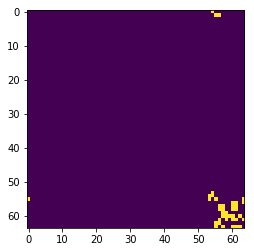

In [14]:
N    = 64
ON   = 255
OFF  = 0
vals = [ON, OFF] 
updateInterval = 25

def initRandom(N):
    grid = np.zeros(N*N).reshape(N, N)
    for i in range(N):
        for j in range(N): 
            grid[i,j] = ON*np.random.randint(2)
    return grid

def initRandomLocal(N,portion=4):
    grid = np.zeros(N*N).reshape(N, N)
    minCell = (portion-2)*N//(2*portion)
    maxCell = (portion+2)*N//(2*portion)
    #print(minCell,maxCell,N, maxCell-minCell)
    for i in range(N):
        for j in range(N): 
            grid[i,j] = OFF
            if minCell<=i<maxCell and minCell<=j<maxCell:
                grid[i,j] = ON*np.random.randint(2)
    return grid

def initGliderGun(N):
    grid = np.zeros(N*N).reshape(N, N)
    for i in range(N):
        for j in range(N): 
            grid[i,j] = OFF
    
    x = N//2
    y = N//2
    grid[x-1,y+1]=ON
    grid[x  ,y+1]=ON
    grid[x+1,y+1]=ON
    grid[x+1,y  ]=ON
    grid[x  ,y-1]=ON
    
    return grid

def initGoose(N):
    grid = np.zeros(N*N).reshape(N, N)
    for i in range(N):
        for j in range(N): 
            grid[i,j] = OFF
    
    x = N//2
    y = N//2
    grid[x   ,y  ]=ON
    grid[x+1 ,y  ]=ON
    grid[x+2 ,y  ]=ON
    grid[x   ,y+1]=ON
    grid[x+10,y+1]=ON
    grid[x+11,y+1]=ON
    grid[x+1 ,y+2]=ON
    grid[x+8 ,y+2]=ON
    grid[x+9 ,y+2]=ON
    grid[x+10,y+2]=ON
    grid[x+12,y+2]=ON
    grid[x+3 ,y+3]=ON
    grid[x+4 ,y+3]=ON
    grid[x+7 ,y+3]=ON
    grid[x+8 ,y+3]=ON
    grid[x+4 ,y+4]=ON
    grid[x+8 ,y+5]=ON
    grid[x+4 ,y+6]=ON
    grid[x+5 ,y+6]=ON
    grid[x+9 ,y+6]=ON
    grid[x+3 ,y+7]=ON
    grid[x+5 ,y+7]=ON
    grid[x+7 ,y+7]=ON
    grid[x+8 ,y+7]=ON
    grid[x+3 ,y+8]=ON
    grid[x+5 ,y+8]=ON
    grid[x+8 ,y+8]=ON
    grid[x+10,y+8]=ON
    grid[x+11,y+8]=ON
    grid[x+2 ,y+9]=ON
    grid[x+7 ,y+9]=ON
    grid[x+8 ,y+9]=ON
    grid[x+2 ,y+10]=ON
    grid[x+3 ,y+10]=ON
    grid[x+2 ,y+11]=ON
    grid[x+3 ,y+11]=ON
    
    return grid


def oneStep(grid, N):
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            
            counter = 0
            for k in [(i+a-1)%N for a in range(3)]:
                for l in [(j+a-1)%N for a in range(3)]:
                    counter = counter + grid[k,l]
            counter = counter - grid[i,j]
            counter = counter/ON
            if grid[i,j] == ON:
                if counter < 2:
                    newGrid[i,j] = OFF   #death by underpopulation
                if counter > 3:
                    newGrid[i,j] = OFF   #death by overpopulation
            elif grid[i,j] == OFF:
                if counter == 3:
                     newGrid[i,j] = ON   #reproduction
            else:
                print('Error')
    return newGrid

def update(frameNum, img, grid, N):
    newGrid=oneStep(grid, N)
                
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img,

def runSimulator(initSetup = 1, iterations = 250):
    fig, ax = plt.subplots()
    if initSetup == 1:
        grid = initRandom(N)
    if initSetup == 2:
        grid = initRandomLocal(N,8)
    if initSetup == 3:
        grid = initGliderGun(N)
    if initSetup == 4:
        grid = initGoose(N)
  
        
    img  = ax.imshow(grid, interpolation='nearest')
    ani  = animation.FuncAnimation(fig, update, fargs=(img, grid, N, ), 
                                      frames = iterations, 
                                      interval=updateInterval, 
                                      save_count=50)

    movie = HTML(ani.to_html5_video())
    return movie


runSimulator(4,170)

In [8]:
def findStructure(cycles,iterator):
    grid = initRandomLocal(N,4)
    origGrid = grid.copy()
    
    grid1 = oneStep(grid, N)
    grid2 = oneStep(grid1, N)
    grid3 = oneStep(grid2, N)
    grid4 = oneStep(grid3, N)
    grid5 = oneStep(grid4, N)
    
    isStableStructure = 'ok'
    for i in range(N-1):
        for j in range(N-1):
            if grid[i,j] != grid4[i+1,j+1]:
                isStableStructure = 'not ok'
                break
    if isStableStructure == 'ok':
        print('ITERATION',iterator)
        fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
        ax1.imshow(origGrid,  interpolation='nearest')
        ax2.imshow(    grid1, interpolation='nearest')
        ax3.imshow(    grid2, interpolation='nearest')
        ax4.imshow(    grid3, interpolation='nearest')
        ax5.imshow(    grid4, interpolation='nearest')
        plt.tight_layout()
    return

for iterator in range(10):
    findStructure(4,iterator)
print('---DONE---')

---DONE---
